# Deep Neural Networks

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score 
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import L2
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')
from sklearn.exceptions import ConvergenceWarning

In [2]:
X_train = pd.read_csv('.\data\csv_data\X_TR_561_SENZA_OUTLIERS.csv')
X_test = pd.read_csv('.\data\csv_data\X_test.csv')
y_train = pd.read_csv('.\data\csv_data\Y_TR_561_SENZA_OUTLIERS.csv')
y_test = pd.read_csv('.\data\csv_data\y_test.csv')

In [3]:
# standardizzazione
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y_train)
encoded_Y = encoder.transform(y_train)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

In [5]:
dummy_y.shape

(7278, 6)

In [7]:
#train & val 
X_train2, X_val, y_train2, y_val = train_test_split(X_train, dummy_y, test_size=0.1, random_state=42)

## MODEL 4

In [22]:
def build_model():
    
    n_feature = X_train2.shape[1]
    model = Sequential()
    model.add(Dense(128, input_dim=n_feature, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(6, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [15]:
es = EarlyStopping(monitor='val_loss', patience=10)
#mc = ModelCheckpoint('best_model_NOREG.h5', monitor='val_loss', save_best_only=True)

model4 = build_model()
history4 = model4.fit(X_train2, y_train2, validation_data=(X_val, y_val), epochs=100, 
                      batch_size=10, callbacks=[es]).history

Epoch 1/100
655/655 [==============================] - 2s 3ms/step - loss: 0.2173 - accuracy: 0.9153 - val_loss: 0.1092 - val_accuracy: 0.9505
Epoch 2/100
655/655 [==============================] - 1s 2ms/step - loss: 0.0960 - accuracy: 0.9626 - val_loss: 0.0909 - val_accuracy: 0.9725
Epoch 3/100
655/655 [==============================] - 1s 2ms/step - loss: 0.0807 - accuracy: 0.9705 - val_loss: 0.0586 - val_accuracy: 0.9835
Epoch 4/100
655/655 [==============================] - 1s 2ms/step - loss: 0.0657 - accuracy: 0.9747 - val_loss: 0.0890 - val_accuracy: 0.9684
Epoch 5/100
655/655 [==============================] - 1s 2ms/step - loss: 0.0807 - accuracy: 0.9730 - val_loss: 0.0801 - val_accuracy: 0.9670
Epoch 6/100
655/655 [==============================] - 1s 2ms/step - loss: 0.0403 - accuracy: 0.9838 - val_loss: 0.0541 - val_accuracy: 0.9808
Epoch 7/100
655/655 [==============================] - 1s 2ms/step - loss: 0.0610 - accuracy: 0.9769 - val_loss: 0.0878 - val_accuracy: 0.9615

In [16]:
encoded_Y_test = encoder.transform(y_test)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y_test = np_utils.to_categorical(encoded_Y_test)

In [17]:
dummy_y_test

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.]], dtype=float32)

In [18]:
model4.evaluate(X_test, dummy_y_test)

93/93 [==============================] - 0s 1ms/step - loss: 0.3380 - accuracy: 0.9444


[0.33801156282424927, 0.9443501830101013]

### PROVA SENZA EARLY STOPPING

In [23]:
model3 = build_model()
history3 = model3.fit(X_train2, y_train2, validation_data=(X_val, y_val), epochs=200, batch_size=10).history

Epoch 1/200
655/655 [==============================] - 2s 2ms/step - loss: 0.2234 - accuracy: 0.9116 - val_loss: 0.0872 - val_accuracy: 0.9725
Epoch 2/200
655/655 [==============================] - 1s 2ms/step - loss: 0.1050 - accuracy: 0.9594 - val_loss: 0.1095 - val_accuracy: 0.9602
Epoch 3/200
655/655 [==============================] - 1s 2ms/step - loss: 0.0742 - accuracy: 0.9699 - val_loss: 0.0514 - val_accuracy: 0.9766
Epoch 4/200
655/655 [==============================] - 1s 2ms/step - loss: 0.0662 - accuracy: 0.9782 - val_loss: 0.0847 - val_accuracy: 0.9753
Epoch 5/200
655/655 [==============================] - 1s 2ms/step - loss: 0.0690 - accuracy: 0.9757 - val_loss: 0.0934 - val_accuracy: 0.9643
Epoch 6/200
655/655 [==============================] - 1s 2ms/step - loss: 0.0449 - accuracy: 0.9823 - val_loss: 0.0517 - val_accuracy: 0.9780
Epoch 7/200
655/655 [==============================] - 1s 2ms/step - loss: 0.0299 - accuracy: 0.9878 - val_loss: 0.0374 - val_accuracy: 0.9890

655/655 [==============================] - 1s 2ms/step - loss: 1.5419e-07 - accuracy: 1.0000 - val_loss: 0.0731 - val_accuracy: 0.9904
Epoch 58/200
655/655 [==============================] - 1s 2ms/step - loss: 1.1138e-07 - accuracy: 1.0000 - val_loss: 0.0722 - val_accuracy: 0.9904
Epoch 59/200
655/655 [==============================] - 1s 2ms/step - loss: 7.7349e-08 - accuracy: 1.0000 - val_loss: 0.0741 - val_accuracy: 0.9904
Epoch 60/200
655/655 [==============================] - 1s 2ms/step - loss: 5.6074e-08 - accuracy: 1.0000 - val_loss: 0.0758 - val_accuracy: 0.9918
Epoch 61/200
655/655 [==============================] - 1s 2ms/step - loss: 3.9785e-08 - accuracy: 1.0000 - val_loss: 0.0769 - val_accuracy: 0.9904
Epoch 62/200
655/655 [==============================] - 1s 2ms/step - loss: 2.7828e-08 - accuracy: 1.0000 - val_loss: 0.0782 - val_accuracy: 0.9890
Epoch 63/200
655/655 [==============================] - 1s 2ms/step - loss: 2.0475e-08 - accuracy: 1.0000 - val_loss: 0.0806 

655/655 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.1097 - val_accuracy: 0.9904
Epoch 113/200
655/655 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.1099 - val_accuracy: 0.9904
Epoch 114/200
655/655 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.1101 - val_accuracy: 0.9904
Epoch 115/200
655/655 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.1102 - val_accuracy: 0.9904
Epoch 116/200
655/655 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.1103 - val_accuracy: 0.9904
Epoch 117/200
655/655 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.1105 - val_accuracy: 0.9904
Epoch 118/200
655/655 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0

655/655 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.1161 - val_accuracy: 0.9904
Epoch 168/200
655/655 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.1162 - val_accuracy: 0.9904
Epoch 169/200
655/655 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.1163 - val_accuracy: 0.9904
Epoch 170/200
655/655 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.1164 - val_accuracy: 0.9904
Epoch 171/200
655/655 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.1165 - val_accuracy: 0.9904
Epoch 172/200
655/655 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.1165 - val_accuracy: 0.9904
Epoch 173/200
655/655 [==============================] - 2s 2ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0

In [24]:
model3.evaluate(X_test, dummy_y_test)

93/93 [==============================] - 0s 1ms/step - loss: 1.1173 - accuracy: 0.9420


[1.1173250675201416, 0.9419748783111572]

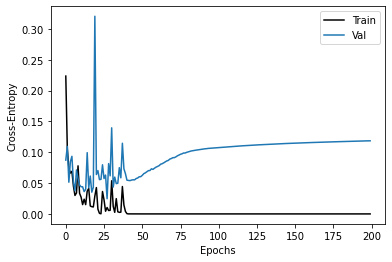

In [51]:
plt.plot(history3['loss'], label='Train', c='k')
plt.plot(history3['val_loss'], label='Val')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.legend()
plt.show()

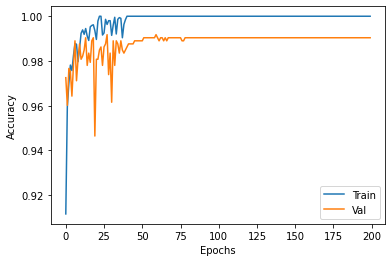

In [31]:
plt.plot(history3['accuracy'], label='Train')
plt.plot(history3['val_accuracy'], label='Val')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## MODEL 1

In [19]:
def build_model1():
    
    n_feature = X_train2.shape[1]
    model = Sequential()
    model.add(Dense(128, input_dim=n_feature, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(6, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [20]:
es = EarlyStopping(monitor='val_loss', patience=10)

model1 = build_model1()
history1 = model1.fit(X_train2, y_train2, validation_data=(X_val, y_val), epochs=100, 
                      batch_size=10, callbacks=[es]).history

Epoch 1/100
655/655 [==============================] - 2s 2ms/step - loss: 0.2551 - accuracy: 0.9002 - val_loss: 0.0915 - val_accuracy: 0.9670
Epoch 2/100
655/655 [==============================] - 1s 2ms/step - loss: 0.0977 - accuracy: 0.9606 - val_loss: 0.0799 - val_accuracy: 0.9657
Epoch 3/100
655/655 [==============================] - 1s 2ms/step - loss: 0.0733 - accuracy: 0.9728 - val_loss: 0.0711 - val_accuracy: 0.9753
Epoch 4/100
655/655 [==============================] - 1s 2ms/step - loss: 0.0688 - accuracy: 0.9742 - val_loss: 0.0684 - val_accuracy: 0.9766
Epoch 5/100
655/655 [==============================] - 1s 2ms/step - loss: 0.0623 - accuracy: 0.9774 - val_loss: 0.0822 - val_accuracy: 0.9712
Epoch 6/100
655/655 [==============================] - 1s 2ms/step - loss: 0.0488 - accuracy: 0.9806 - val_loss: 0.1995 - val_accuracy: 0.9451
Epoch 7/100
655/655 [==============================] - 1s 2ms/step - loss: 0.0680 - accuracy: 0.9748 - val_loss: 0.0796 - val_accuracy: 0.9780

In [21]:
model1.evaluate(X_test, dummy_y_test)

93/93 [==============================] - 0s 1ms/step - loss: 0.3799 - accuracy: 0.9447


[0.37991711497306824, 0.9446895122528076]

## REGULARIZATIONS

### L2

In [28]:
from keras.regularizers import l2

def build_L2_model():
    # define the model
    model = Sequential()

    n_feature = X_train.shape[1]
    #h_dim=100
    model.add(Dense(128, activation='relu', input_shape=(n_feature,), kernel_regularizer=l2(0.01)))
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
    #model.add(Dense(h_dim, activation='relu', kernel_regularizer=l2(0.01)))
    #model.add(Dense(h_dim, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dense(6, activation='softmax'))

    #compile the model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [29]:
L2_model = build_L2_model()
h_L2 = L2_model.fit(X_train2, y_train2, validation_data=(X_val, y_val), epochs=100, 
                    batch_size=10, callbacks=[es]).history

Epoch 1/100
655/655 [==============================] - 2s 2ms/step - loss: 1.4756 - accuracy: 0.9116 - val_loss: 0.5570 - val_accuracy: 0.9451
Epoch 2/100
655/655 [==============================] - 1s 2ms/step - loss: 0.4255 - accuracy: 0.9438 - val_loss: 0.2983 - val_accuracy: 0.9615
Epoch 3/100
655/655 [==============================] - 1s 2ms/step - loss: 0.3031 - accuracy: 0.9502 - val_loss: 0.3394 - val_accuracy: 0.9245
Epoch 4/100
655/655 [==============================] - 1s 2ms/step - loss: 0.2622 - accuracy: 0.9536 - val_loss: 0.2415 - val_accuracy: 0.9615
Epoch 5/100
655/655 [==============================] - 1s 2ms/step - loss: 0.2327 - accuracy: 0.9585 - val_loss: 0.2873 - val_accuracy: 0.9272
Epoch 6/100
655/655 [==============================] - 1s 2ms/step - loss: 0.2104 - accuracy: 0.9621 - val_loss: 0.2175 - val_accuracy: 0.9547
Epoch 7/100
655/655 [==============================] - 1s 2ms/step - loss: 0.2100 - accuracy: 0.9608 - val_loss: 0.2325 - val_accuracy: 0.9478

Epoch 58/100
655/655 [==============================] - 1s 2ms/step - loss: 0.1226 - accuracy: 0.9745 - val_loss: 0.1054 - val_accuracy: 0.9821
Epoch 59/100
655/655 [==============================] - 1s 2ms/step - loss: 0.1157 - accuracy: 0.9748 - val_loss: 0.1180 - val_accuracy: 0.9794
Epoch 60/100
655/655 [==============================] - 1s 2ms/step - loss: 0.1085 - accuracy: 0.9805 - val_loss: 0.1226 - val_accuracy: 0.9808
Epoch 61/100
655/655 [==============================] - 1s 2ms/step - loss: 0.1284 - accuracy: 0.9742 - val_loss: 0.1260 - val_accuracy: 0.9698
Epoch 62/100
655/655 [==============================] - 1s 2ms/step - loss: 0.1249 - accuracy: 0.9759 - val_loss: 0.1272 - val_accuracy: 0.9712
Epoch 63/100
655/655 [==============================] - 1s 2ms/step - loss: 0.1096 - accuracy: 0.9803 - val_loss: 0.1072 - val_accuracy: 0.9821
Epoch 64/100
655/655 [==============================] - 1s 2ms/step - loss: 0.1222 - accuracy: 0.9757 - val_loss: 0.2609 - val_accuracy:

In [30]:
L2_model.evaluate(X_test, dummy_y_test)

93/93 [==============================] - 0s 1ms/step - loss: 0.2232 - accuracy: 0.9447


[0.22324949502944946, 0.9446895122528076]

In [32]:
def build_L2_model_2():
    # define the model
    model = Sequential()

    n_feature = X_train.shape[1]
    #h_dim=100
    model.add(Dense(128, activation='relu', input_shape=(n_feature,), kernel_regularizer=l2(0.001)))
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
    #model.add(Dense(h_dim, activation='relu', kernel_regularizer=l2(0.01)))
    #model.add(Dense(h_dim, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dense(6, activation='softmax'))

    #compile the model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [33]:
L2_model_2 = build_L2_model_2()
h_L2_2 = L2_model_2.fit(X_train2, y_train2, validation_data=(X_val, y_val), epochs=100, 
                    batch_size=10, callbacks=[es]).history

Epoch 1/100
655/655 [==============================] - 2s 2ms/step - loss: 0.4966 - accuracy: 0.9153 - val_loss: 0.4476 - val_accuracy: 0.9313
Epoch 2/100
655/655 [==============================] - 1s 2ms/step - loss: 0.3165 - accuracy: 0.9643 - val_loss: 0.2790 - val_accuracy: 0.9657
Epoch 3/100
655/655 [==============================] - 1s 2ms/step - loss: 0.2606 - accuracy: 0.9669 - val_loss: 0.2227 - val_accuracy: 0.9794
Epoch 4/100
655/655 [==============================] - 1s 2ms/step - loss: 0.2265 - accuracy: 0.9676 - val_loss: 0.2358 - val_accuracy: 0.9574
Epoch 5/100
655/655 [==============================] - 1s 2ms/step - loss: 0.1897 - accuracy: 0.9722 - val_loss: 0.1761 - val_accuracy: 0.9725
Epoch 6/100
655/655 [==============================] - 1s 2ms/step - loss: 0.1713 - accuracy: 0.9751 - val_loss: 0.1464 - val_accuracy: 0.9712
Epoch 7/100
655/655 [==============================] - 1s 2ms/step - loss: 0.1492 - accuracy: 0.9762 - val_loss: 0.1440 - val_accuracy: 0.9808

In [34]:
L2_model_2.evaluate(X_test, dummy_y_test)

93/93 [==============================] - 0s 1ms/step - loss: 0.2991 - accuracy: 0.9396


[0.2991251051425934, 0.9395995736122131]

In [35]:
def build_L2_model_3():
    # define the model
    model = Sequential()

    n_feature = X_train.shape[1]
    #h_dim=100
    model.add(Dense(128, activation='relu', input_shape=(n_feature,), kernel_regularizer=l2(0.1)))
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.1)))
    #model.add(Dense(h_dim, activation='relu', kernel_regularizer=l2(0.01)))
    #model.add(Dense(h_dim, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dense(6, activation='softmax'))

    #compile the model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [36]:
L2_model_3 = build_L2_model_3()
h_L2_3 = L2_model_3.fit(X_train2, y_train2, validation_data=(X_val, y_val), epochs=100, 
                    batch_size=10, callbacks=[es]).history

Epoch 1/100
655/655 [==============================] - 2s 2ms/step - loss: 2.9958 - accuracy: 0.8624 - val_loss: 0.7135 - val_accuracy: 0.8008
Epoch 2/100
655/655 [==============================] - 1s 2ms/step - loss: 0.5991 - accuracy: 0.8969 - val_loss: 0.5802 - val_accuracy: 0.8970
Epoch 3/100
655/655 [==============================] - 1s 2ms/step - loss: 0.5051 - accuracy: 0.9252 - val_loss: 0.4494 - val_accuracy: 0.9354
Epoch 4/100
655/655 [==============================] - 1s 2ms/step - loss: 0.4497 - accuracy: 0.9315 - val_loss: 0.4310 - val_accuracy: 0.9533
Epoch 5/100
655/655 [==============================] - 1s 2ms/step - loss: 0.4085 - accuracy: 0.9389 - val_loss: 0.4293 - val_accuracy: 0.9231
Epoch 6/100
655/655 [==============================] - 1s 2ms/step - loss: 0.3836 - accuracy: 0.9437 - val_loss: 0.5029 - val_accuracy: 0.8750
Epoch 7/100
655/655 [==============================] - 1s 2ms/step - loss: 0.3740 - accuracy: 0.9437 - val_loss: 0.3835 - val_accuracy: 0.9327

In [37]:
L2_model_3.evaluate(X_test, dummy_y_test)

93/93 [==============================] - 0s 1ms/step - loss: 0.3750 - accuracy: 0.9091


[0.37495994567871094, 0.9090600609779358]

### DROPOUT

In [38]:
from keras.layers import Dropout

def build_DROPOUT_model():
    # define the model
    model = Sequential()

    n_feature = X_train.shape[1]
    #h_dim=100
    model.add(Dense(128, activation='relu', input_shape=(n_feature,)))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    #model.add(Dropout(0.2))
    #model.add(Dense(h_dim, activation='relu'))
    #model.add(Dropout(0.2))
    #model.add(Dense(h_dim, activation='relu'))
    #linear activation
    model.add(Dense(6, activation='softmax'))

    #compile the model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [39]:
DROPOUT_model = build_DROPOUT_model()
h_DROPOUT = DROPOUT_model.fit(X_train2, y_train2, validation_data=(X_val, y_val), 
                              epochs=100, batch_size=10, callbacks=[es]).history

Epoch 1/100
655/655 [==============================] - 2s 2ms/step - loss: 0.2665 - accuracy: 0.8965 - val_loss: 0.1858 - val_accuracy: 0.9341
Epoch 2/100
655/655 [==============================] - 1s 2ms/step - loss: 0.1184 - accuracy: 0.9563 - val_loss: 0.0735 - val_accuracy: 0.9712
Epoch 3/100
655/655 [==============================] - 1s 2ms/step - loss: 0.1031 - accuracy: 0.9608 - val_loss: 0.0571 - val_accuracy: 0.9794
Epoch 4/100
655/655 [==============================] - 1s 2ms/step - loss: 0.0891 - accuracy: 0.9664 - val_loss: 0.0576 - val_accuracy: 0.9725
Epoch 5/100
655/655 [==============================] - 1s 2ms/step - loss: 0.0645 - accuracy: 0.9766 - val_loss: 0.0515 - val_accuracy: 0.9780
Epoch 6/100
655/655 [==============================] - 1s 2ms/step - loss: 0.0686 - accuracy: 0.9734 - val_loss: 0.0655 - val_accuracy: 0.9766
Epoch 7/100
655/655 [==============================] - 1s 2ms/step - loss: 0.0660 - accuracy: 0.9766 - val_loss: 0.0952 - val_accuracy: 0.9684

In [41]:
DROPOUT_model.evaluate(X_test, dummy_y_test)

93/93 [==============================] - 0s 1ms/step - loss: 0.3314 - accuracy: 0.9460


[0.33139973878860474, 0.9460468292236328]

In [42]:
def build_DROPOUT_model_2():
    # define the model
    model = Sequential()

    n_feature = X_train.shape[1]
    #h_dim=100
    model.add(Dense(128, activation='relu', input_shape=(n_feature,)))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu'))
    #model.add(Dropout(0.2))
    #model.add(Dense(h_dim, activation='relu'))
    #model.add(Dropout(0.2))
    #model.add(Dense(h_dim, activation='relu'))
    #linear activation
    model.add(Dense(6, activation='softmax'))

    #compile the model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [43]:
DROPOUT_model_2 = build_DROPOUT_model_2()
h_DROPOUT_2 = DROPOUT_model_2.fit(X_train2, y_train2, validation_data=(X_val, y_val), 
                              epochs=100, batch_size=10, callbacks=[es]).history

Epoch 1/100
655/655 [==============================] - 2s 2ms/step - loss: 0.3266 - accuracy: 0.8718 - val_loss: 0.1111 - val_accuracy: 0.9629
Epoch 2/100
655/655 [==============================] - 1s 2ms/step - loss: 0.1533 - accuracy: 0.9395 - val_loss: 0.0751 - val_accuracy: 0.9684
Epoch 3/100
655/655 [==============================] - 1s 2ms/step - loss: 0.1254 - accuracy: 0.9576 - val_loss: 0.0586 - val_accuracy: 0.9766
Epoch 4/100
655/655 [==============================] - 1s 2ms/step - loss: 0.0918 - accuracy: 0.9655 - val_loss: 0.0784 - val_accuracy: 0.9684
Epoch 5/100
655/655 [==============================] - 1s 2ms/step - loss: 0.0860 - accuracy: 0.9682 - val_loss: 0.0594 - val_accuracy: 0.9766
Epoch 6/100
655/655 [==============================] - 1s 2ms/step - loss: 0.0863 - accuracy: 0.9673 - val_loss: 0.0881 - val_accuracy: 0.9712
Epoch 7/100
655/655 [==============================] - 1s 2ms/step - loss: 0.0783 - accuracy: 0.9733 - val_loss: 0.0609 - val_accuracy: 0.9794

In [44]:
DROPOUT_model_2.evaluate(X_test, dummy_y_test)

93/93 [==============================] - 0s 1ms/step - loss: 0.2861 - accuracy: 0.9484


[0.28611764311790466, 0.9484221339225769]

In [45]:
def build_DROPOUT_model_3():
    # define the model
    model = Sequential()

    n_feature = X_train.shape[1]
    #h_dim=100
    model.add(Dense(128, activation='relu', input_shape=(n_feature,)))
    model.add(Dropout(0.1))
    model.add(Dense(64, activation='relu'))
    #model.add(Dropout(0.2))
    #model.add(Dense(h_dim, activation='relu'))
    #model.add(Dropout(0.2))
    #model.add(Dense(h_dim, activation='relu'))
    #linear activation
    model.add(Dense(6, activation='softmax'))

    #compile the model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [46]:
DROPOUT_model_3 = build_DROPOUT_model_3()
h_DROPOUT_3 = DROPOUT_model_3.fit(X_train2, y_train2, validation_data=(X_val, y_val), 
                              epochs=100, batch_size=10, callbacks=[es]).history

Epoch 1/100
655/655 [==============================] - 2s 2ms/step - loss: 0.2422 - accuracy: 0.9058 - val_loss: 0.1081 - val_accuracy: 0.9547
Epoch 2/100
655/655 [==============================] - 1s 2ms/step - loss: 0.1046 - accuracy: 0.9586 - val_loss: 0.0728 - val_accuracy: 0.9698
Epoch 3/100
655/655 [==============================] - 1s 2ms/step - loss: 0.0974 - accuracy: 0.9638 - val_loss: 0.0679 - val_accuracy: 0.9739
Epoch 4/100
655/655 [==============================] - 1s 2ms/step - loss: 0.0706 - accuracy: 0.9692 - val_loss: 0.0549 - val_accuracy: 0.9794
Epoch 5/100
655/655 [==============================] - 1s 2ms/step - loss: 0.0752 - accuracy: 0.9745 - val_loss: 0.0962 - val_accuracy: 0.9615
Epoch 6/100
655/655 [==============================] - 1s 2ms/step - loss: 0.0601 - accuracy: 0.9786 - val_loss: 0.0752 - val_accuracy: 0.9739
Epoch 7/100
655/655 [==============================] - 1s 2ms/step - loss: 0.0698 - accuracy: 0.9742 - val_loss: 0.0842 - val_accuracy: 0.9766

In [47]:
DROPOUT_model_3.evaluate(X_test, dummy_y_test)

93/93 [==============================] - 0s 1ms/step - loss: 0.4634 - accuracy: 0.9223


[0.4633965790271759, 0.9222938418388367]

In [48]:
def build_DROPOUT_model_4():
    # define the model
    model = Sequential()

    n_feature = X_train.shape[1]
    #h_dim=100
    model.add(Dense(128, activation='relu', input_shape=(n_feature,)))
    model.add(Dropout(0.4))
    model.add(Dense(64, activation='relu'))
    #model.add(Dropout(0.2))
    #model.add(Dense(h_dim, activation='relu'))
    #model.add(Dropout(0.2))
    #model.add(Dense(h_dim, activation='relu'))
    #linear activation
    model.add(Dense(6, activation='softmax'))

    #compile the model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [49]:
DROPOUT_model_4 = build_DROPOUT_model_4()
h_DROPOUT_4 = DROPOUT_model_4.fit(X_train2, y_train2, validation_data=(X_val, y_val), 
                              epochs=100, batch_size=10, callbacks=[es]).history

Epoch 1/100
655/655 [==============================] - 2s 2ms/step - loss: 0.3807 - accuracy: 0.8505 - val_loss: 0.1340 - val_accuracy: 0.9464
Epoch 2/100
655/655 [==============================] - 1s 2ms/step - loss: 0.1635 - accuracy: 0.9366 - val_loss: 0.0936 - val_accuracy: 0.9588
Epoch 3/100
655/655 [==============================] - 1s 2ms/step - loss: 0.1256 - accuracy: 0.9536 - val_loss: 0.0947 - val_accuracy: 0.9602
Epoch 4/100
655/655 [==============================] - 1s 2ms/step - loss: 0.1203 - accuracy: 0.9560 - val_loss: 0.0961 - val_accuracy: 0.9629
Epoch 5/100
655/655 [==============================] - 1s 2ms/step - loss: 0.1007 - accuracy: 0.9615 - val_loss: 0.0863 - val_accuracy: 0.9684
Epoch 6/100
655/655 [==============================] - 1s 2ms/step - loss: 0.1042 - accuracy: 0.9603 - val_loss: 0.0685 - val_accuracy: 0.9712
Epoch 7/100
655/655 [==============================] - 1s 2ms/step - loss: 0.0857 - accuracy: 0.9687 - val_loss: 0.0747 - val_accuracy: 0.9739

In [50]:
DROPOUT_model_4.evaluate(X_test, dummy_y_test)

93/93 [==============================] - 0s 1ms/step - loss: 0.3382 - accuracy: 0.9393


[0.33821961283683777, 0.9392602443695068]